In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [6]:
# we assume these columns are not important for price prediction
df = data.drop(['area_type','availability','society','balcony'],axis='columns')
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df.shape

(13320, 5)

###  Handling Missing Data

In [8]:
# Handling NA Values
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# we drop since NA values are small in number compared to the size of data set
df1=df.dropna()

In [10]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

###  FEATURE ENGINEERING - Handling unstructured data that is not uniform ( e.g Datatype Conversion)

In [12]:
df1['BHK'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ganta\AppData\Local\Temp\ipykernel_23036\1569755878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BHK'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
df1.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [16]:
#df.info()
df1.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
BHK             int64
dtype: object

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
# unstructed data, not uniform 
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
df1['total_sqft'][30].split('-')

['2100 ', ' 2850']

In [20]:
def convertsqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return ( float(tokens[0]) + float(tokens[1])/2 )
    try:
        return float(x)
    except:
        return None

In [21]:
convertsqft('2100 - 2850')

3525.0

In [22]:
df2=df1.copy()

In [23]:
df2['total_sqft'] = df1['total_sqft'].apply(convertsqft)
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK


### FEATURE ENGINEERING - Getting the data ready for Outlier Detection ( Adding a useful column)

In [25]:
df2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [26]:
# create a new column price per sqft 
df3=df2.copy()
df3['priceperSqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,BHK,priceperSqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Getting the data ready for Onhot Encoding ( Dimensionality Reduction by grouping few column values which has less number of rows into One )

In [27]:
len(df3.location.unique())

1304

In [28]:
# to remove any extra spaces if there are same names but differ only because of spaces
# removes spaces at either ends
df3['location']=df3['location'].apply(lambda x: x.strip())

In [29]:
locationstats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
locationstats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [30]:
locationstats[locationstats<=10]

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [31]:
locationstats_lessthan_10 = locationstats[locationstats<=10]
locationstats_lessthan_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [32]:
df3['location'] = df3['location'].apply(lambda x: 'Other' if x in locationstats_lessthan_10 else x)
len(df3.location.unique())

242

In [33]:
df3.head(10)

,location,size,total_sqft,bath,price,BHK,priceperSqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Performing Outlier Detection using Business Logic

In [34]:
# checking if the size of each bedroom is less than 300 sqm which is unrealistic
df3[(df3['total_sqft']/df3['BHK'])<300]

,location,size,total_sqft,bath,price,BHK,priceperSqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [35]:
df4 = df3[~((df3['total_sqft']/df3['BHK'])<300)]
df4.shape

(12502, 7)

### Outlier Removal Using Standard Deviation and Mean

In [36]:
df4.priceperSqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: priceperSqft, dtype: float64

In [37]:
left = df4.priceperSqft.mean() - 1*df4.priceperSqft.std()
left

2114.6807714609868

In [38]:
dftest=df4.groupby('location')
dftest

In [39]:
df4.head()

,location,size,total_sqft,bath,price,BHK,priceperSqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [40]:
# removing outliers on either sides above 1 standard deviation for each location group
def remove_prpsqft_outliers(df):
    df_new = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.priceperSqft)
        st = np.std(sub_df.priceperSqft)
        NoOutlier_df = sub_df[(sub_df.priceperSqft > (m-st)) & (sub_df.priceperSqft <= (m+st))]
        df_new = pd.concat([df_new,NoOutlier_df], ignore_index=False)
    return df_new

In [41]:
df5 = remove_prpsqft_outliers(df4)
df5.head()

,location,size,total_sqft,bath,price,BHK,priceperSqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [42]:
df5.shape

(10231, 7)

In [43]:
df5.priceperSqft.describe()

count    10231.000000
mean      5645.224070
std       2271.334896
min       1250.000000
25%       4217.096349
50%       5163.333333
75%       6414.219181
max      24509.803922
Name: priceperSqft, dtype: float64

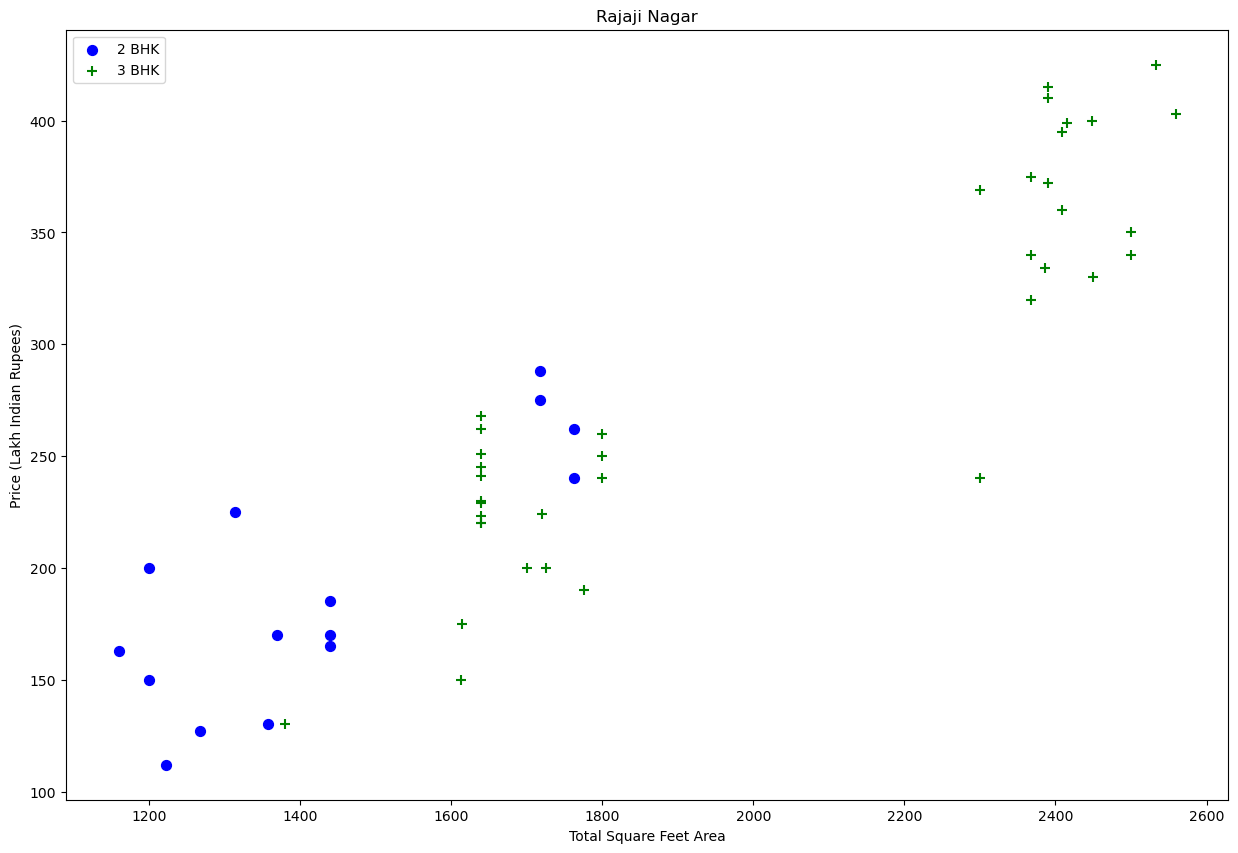

In [44]:
# To check if the price for a 3BHK is less than that of 2BHK for the same square feet  
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

In [45]:
# here it will fetch the value for the previous no. of bedroom group.
# For example, for 1 bedroom group it will be None , as there is no possibe value stored for 0 bedroom group, simply because there is not any value like that in dataframe
# it checks if there is dictionary present ( we didn't have for 1 bedroom group ) because None value will throw error. It also checks if it has more than 5 values or not. Because we cannot decide to discard something without comparing it with substantial data values.        
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for key, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                 'mean': np.mean(bhk_df.priceperSqft),
                 'std': np.std(bhk_df.priceperSqft),
                 'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.priceperSqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [46]:
df6 = remove_bhk_outliers(df5)
df6.shape

(7326, 7)

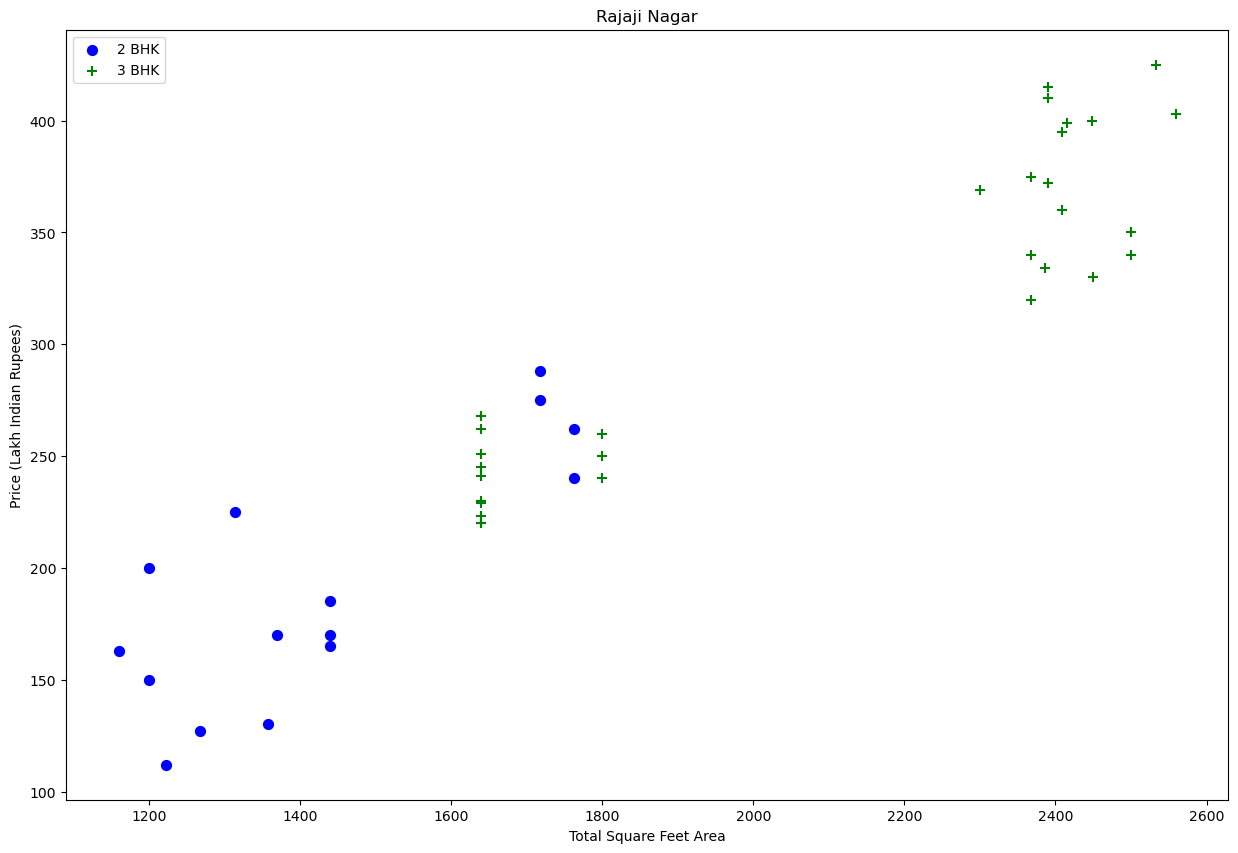

In [47]:
plot_scatter_chart(df6,"Rajaji Nagar")

Text(0, 0.5, 'Count')

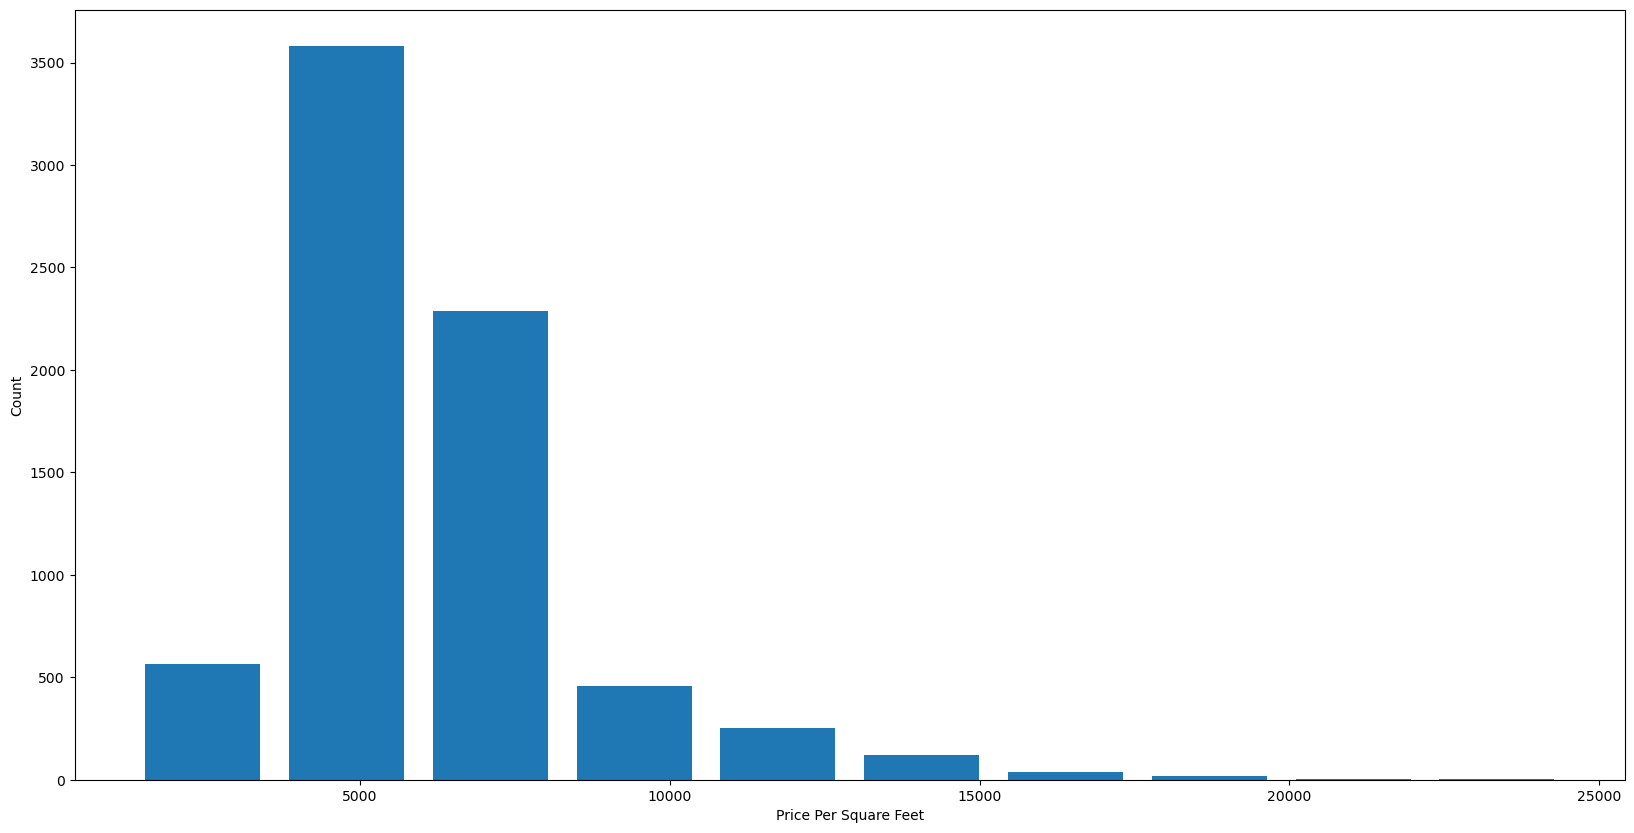

In [48]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.priceperSqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [49]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [50]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,BHK,priceperSqft
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
3096,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3609,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9935,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


### Outlier Removal for Bathroom features

Text(0, 0.5, 'Count')

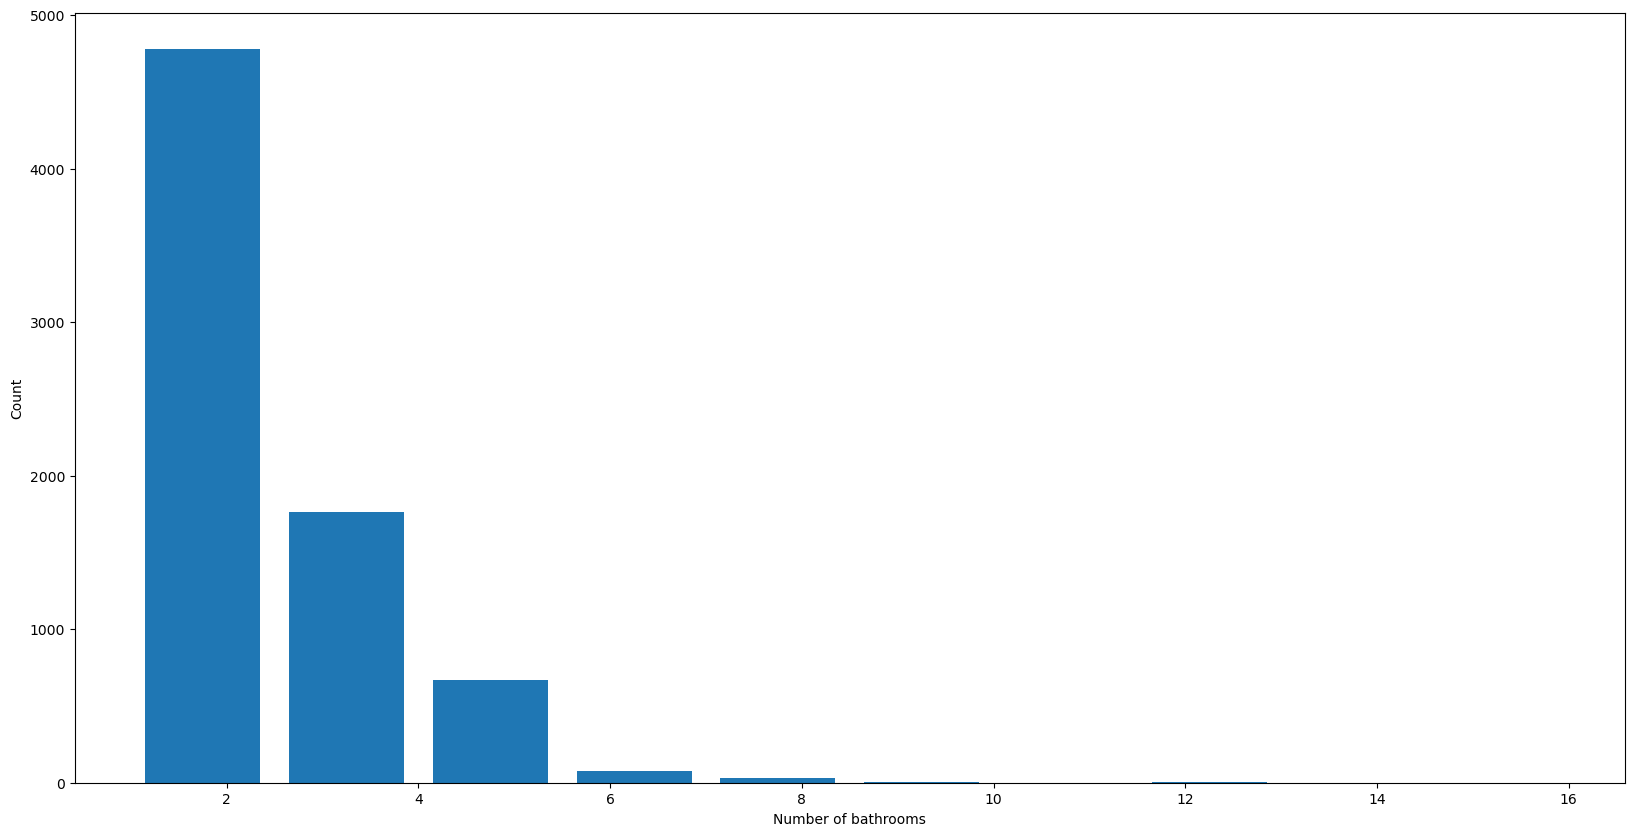

In [51]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [52]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home
df6[df6.bath>df6.BHK+2]

,location,size,total_sqft,bath,price,BHK,priceperSqft
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
2620,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [53]:
df7 = df6[df6.bath<df6.BHK+2]
df7.shape

(7252, 7)

In [54]:
df7.head(2)

,location,size,total_sqft,bath,price,BHK,priceperSqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [55]:
df8 = df7.drop(['size','priceperSqft'],axis='columns')
df8.head(3)

,location,total_sqft,bath,price,BHK
210,1st Block Jayanagar,2850.0,4.0,428.0,4
848,1st Block Jayanagar,1630.0,3.0,194.0,3
2152,1st Block Jayanagar,1875.0,2.0,235.0,3


### Use One Hot Encoding For Location

In [56]:
dummies = pd.get_dummies(df8.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7138,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7358,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
df9=pd.concat([df8,dummies.drop('Other',axis='columns')],axis='columns')
df9.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7138,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7358,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
df10 = df9.drop('location',axis='columns')
df10.head(2)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### MODEL BUILDING

In [59]:
X = df10.drop('price',axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7138,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7358,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
y = df10.price
y.head()

210     428.0
848     194.0
2152    235.0
7138    130.0
7358    148.0
Name: price, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [62]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
# train the model
lrmodel.fit(X_train,y_train)
# how good the model is(compares y_test with y_pred)
lrmodel.score(X_test,y_test)

0.841351939046085

### Using K Fold cross validation to measure accuracy of the LinearRegression model

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# randomize the samples
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87923264, 0.78625779, 0.8559856 , 0.84551004, 0.83570477])

In [65]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [66]:
find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.840538,{'normalize': True}
1,lasso,0.708019,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.755124,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#### It shows that linear Regression is the best model with the best parameters

### Test(Evaluate) the model for few properties

In [67]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [73]:
# returns the columns index
np.where(X.columns=='2nd Stage Nagarbhavi')[0][0]

6

In [103]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
   
    return lrmodel.predict([x])[0]

In [104]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.41613573798084

In [100]:
x = np.zeros(10)
x[7]=2
x

array([0., 0., 0., 0., 0., 0., 0., 2., 0., 0.])

In [105]:
def price_predict(location,area,bath,bhk):
    X = np.zeros(len(x.columns))
    X[0] = area
    X[1] = bath
    X[2] = bhk
    if location !='other':
        X[np.where(x.columns == location)[0][0]] = 1
    return model.predict([X])[0]